## Loading the files to be used as the dataset

import os
path = 'C:/Users/Mary/Documents/AI_ML_Learning_Path/ham-and-spam-dataset/hamnspam/'
mails = []
labels =[]

for label in ['spam/', 'ham/']:
    f_name = os.listdir(os.path.join(path,label))
    for name in f_name:
        f = open((path + label + name),'r', encoding = 'latin-1')
        bolk = f.read()
        mails.append(bolk)
        labels.append(label)

df = pd.DataFrame({'emails': mails, 'label':labels})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

df.to_csv('spam.csv')

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import string
from sklearn.model_selection import train_test_split

In [2]:
#load file as Dataframe
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,Unnamed: 0,emails,label
0,0,mv 1 00001.bfc8d64d12b325ff385cca8d07b84288\nm...,1
1,1,From 12a1mailbot1@web.de Thu Aug 22 13:17:22 ...,1
2,2,From ilug-admin@linux.ie Thu Aug 22 13:27:39 ...,1
3,3,From sabrina@mx3.1premio.com Thu Aug 22 14:44...,1
4,4,From wsup@playful.com Thu Aug 22 16:17:00 200...,1


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.rename(columns={'label': 'spam'}, inplace=True)

In [6]:
df['spam'].value_counts()

0    2551
1     501
Name: spam, dtype: int64

There are more non-spam emails than there are spam with an approximate 5:1 ratio

In [7]:
df.isnull().sum()

emails    0
spam      0
dtype: int64

In [8]:
df.duplicated().sum()

5

In [9]:
#viewing a sample of a raw email text
df['emails'][5]

'From social-admin@linux.ie  Thu Aug 22 16:37:34 2002\nReturn-Path: <social-admin@linux.ie>\nDelivered-To: zzzz@localhost.example.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.example.com (Postfix) with ESMTP id 30B2143F99\n\tfor <zzzz@localhost>; Thu, 22 Aug 2002 11:37:34 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 16:37:34 +0100 (IST)\nReceived: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MFYOZ12548 for\n    <zzzz+ilug-social@jmason.org>; Thu, 22 Aug 2002 16:34:25 +0100\nReceived: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org\n    (8.9.3/8.9.3) with ESMTP id QAA07692; Thu, 22 Aug 2002 16:33:43 +0100\nReceived: from email.qves.com ([67.104.83.251]) by lugh.tuatha.org\n    (8.9.3/8.9.3) with ESMTP id QAA07662 for <social@linux.ie>; Thu,\n    22 Aug 2002 16:33:37 +0100\nX-Au

## Converting emails to plain text

In [10]:
import email

# Extract the email text for each email
email_texts = []
for raw_email in df['emails']:
    email_message = email.message_from_string(raw_email)
    email_text = ""

    for part in email_message.walk():
        if part.get_content_type() == 'text/plain':
            email_text += part.get_payload()

    email_texts.append(email_text)

# Add the email text as a new column to the dataset
df['email_text'] = email_texts

# Save the updated dataset to a new file
df.to_csv('emails_with_text.csv', index=False)


In [11]:
#viewing a sample of a filtered email text
df['email_text'][5]

"I thought you might like these:\n1) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822slim1\n\n2) Fight The Risk of Cancer! \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822nic1 \n\n3) Get the Child Support You Deserve - Free Legal Advice \nhttp://www.freeyankee.com/cgi/fy2/to.cgi?l=822ppl1\n\nOffer Manager\nDaily-Deals\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\nhttp://www.qves.com/trim/?social@linux.ie%7C29%7C134077\n\n\n-- \nIrish Linux Users' Group Social Events: social@linux.ie\nhttp://www.linux.ie/mailman/listinfo/social for (un)subscription information.\nList maintainer: listmaster@linux.ie\n\n"

## Preprocessing the text

#### Cleaning the text

In [12]:
#function to clean and tokenize the email text
def preprocess_email(email):
    #remove punctuation
    email = email.translate(str.maketrans('','',string.punctuation))
    #convert to lower case 
    email = email.lower()
    #tokenize text
    tokens = nltk.word_tokenize(email)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    #lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    #join the tokens back to a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [13]:
#Preprocess the email text data
df['cleaned_email'] = df['emails'].apply(preprocess_email)

In [14]:
#view a sample of cleaned email text
df['cleaned_email'][5]

'socialadminlinuxie thu aug 22 163734 2002 returnpath socialadminlinuxie deliveredto zzzzlocalhostexamplecom received localhost localhost 127001 phoboslabsexamplecom postfix esmtp id 30b2143f99 zzzzlocalhost thu 22 aug 2002 113734 0400 edt received phobos 127001 localhost imap fetchmail590 zzzzlocalhost singledrop thu 22 aug 2002 163734 0100 ist received lughtuathaorg rootlughtuathaorg 19412514545 dogmaslashnullorg 81168116 esmtp id g7mfyoz12548 zzzzilugsocialjmasonorg thu 22 aug 2002 163425 0100 received lugh rootlocalhost 127001 lughtuathaorg 893893 esmtp id qaa07692 thu 22 aug 2002 163343 0100 received emailqvescom 6710483251 lughtuathaorg 893893 esmtp id qaa07662 sociallinuxie thu 22 aug 2002 163337 0100 xauthenticationwarning lughtuathaorg host 6710483251 claimed emailqvescom received qvp0080 169254611 emailqvescom microsoft smtpsvc5021952966 thu 22 aug 2002 093308 0600 slim n trim yenenemx21premiocom sociallinuxie date thu 22 aug 2002 093307 0600 messageid 104c1101c249f136e098b00

In [15]:
#defining the features for the model
x = df['cleaned_email']
y = df['spam']

In [16]:
#split the dataset into train and test partitions
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

#### Tokenizing the text

In [17]:
#vectorize the text data using the bag-of-words approach
count_vectorizer = CountVectorizer()
x_train_counts = count_vectorizer.fit_transform(x_train)
x_test_counts = count_vectorizer.transform(x_test)

In [18]:
#transform the counts to TF-IDF features
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

## Create a Logistic Regression Model

#### First,  finding the best C hyperparameter for better perfomance of the model using GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

#### Split into validation sets

In [20]:
#split into validation sets
x_value, x_val, y_value, y_val = train_test_split(x_train, y_train, test_size = 0.2 , random_state = 42)

In [21]:
#vectorize the text data using the bag-of-words approach
x_value_counts = count_vectorizer.fit_transform(x_value)

In [22]:
#transform the counts to TF-IDF features
x_value_tfidf = tfidf_transformer.fit_transform(x_value_counts)

In [38]:
#define the parameter grid to search over
param_grid = {'C': [0.1,1,10]}

In [39]:
#create a logistic Regression object
log = LogisticRegression()

In [40]:
#create a grid search object with cross-validation
grid_search = GridSearchCV(log, param_grid, cv = 5, scoring = 'accuracy')

In [41]:
#fit the grid search object to the training data
grid_search.fit(x_value_tfidf, y_value)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10]}, scoring='accuracy')

In [42]:
#print the best hyperparameters and performance
print('Best Hyperparameters: ', grid_search.best_params_)
print('Validation accuracy: ', grid_search.best_score_)

Best Hyperparameters:  {'C': 10}
Validation accuracy:  0.986165650206571


### Train the final logistic Regression model on the combined training and validation sets with the best value of C

In [43]:
best_c = grid_search.best_params_['C']
logreg_model = LogisticRegression(penalty = 'l2',C = best_c)
logreg_model.fit(x_train_tfidf, y_train)

LogisticRegression(C=10)

## Evaluate the model's performance on the testing data

In [44]:
y_pred = logreg_model.predict(x_test_tfidf)

In [45]:
accuracy_score(y_test, y_pred)

0.9918166939443536

In [46]:
confusion_matrix(y_test, y_pred)

array([[497,   0],
       [  5, 109]], dtype=int64)

## Perform cross-validation for better model evaluation
- This was to confirm that the model is not overfitting

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model, x_train_tfidf, y_train,cv = 10)
print('Scores: {}'.format(scores))

Scores: [0.9877551  0.99180328 0.99590164 0.99180328 0.98770492 0.9795082
 1.         0.97540984 0.98770492 0.98360656]


#### Viewing a few entries of test dataset

In [33]:
x_test[:10]

270     returnpath lerleramilerctrorg deliverydate fri...
544     ilugadminlinuxie fri aug 23 110751 2002 return...
1239    forkadminxentcom sat sep 21 104320 2002 return...
554     ilugadminlinuxie fri aug 23 110757 2002 return...
2323    returnpath timonecomcastnet deliverydate sun s...
332     returnpath lerleramilerctrorg deliverydate tue...
1228    forkadminxentcom fri sep 20 161602 2002 return...
2355    returnpath nealewoozleorg deliverydate wed sep...
423     paige455aolcom sun sep 22 141309 2002 returnpa...
2099    replied thu 26 sep 2002 113744 0100 replied do...
Name: cleaned_email, dtype: object

#### Viewing the labels for the entries

In [34]:
y_test[:10]

270     1
544     0
1239    0
554     0
2323    0
332     1
1228    0
2355    0
423     1
2099    0
Name: spam, dtype: int64

#### An example of an email labeled spam

In [35]:
x_test[4:6].values[0]

'returnpath timonecomcastnet deliverydate sun sep 8 204813 2002 timonecomcastnet tim peter date sun 08 sep 2002 154813 0400 subject spambayes testing result inreplyto 20020908172113ga26741glacierarctrixcom messageid lnbbljkpbehfedalkolccepkbcabtimonecomcastnet neil trained classifier using 3 set 500 ham spam missing half test run result due cmppy bug since fixed custom fiddling figure 3 reported run false positive percentage 0187 0749 0780 total unique fp 19 false negative percentage 2072 2448 0574 total unique fn 43 total unique figure count 6 run individualrun fp fn percentage missing 3 run jeremy reported custom fiddling figure 4 set 600 ham spam false positive percentage 0000 1398 1398 0000 1242 1242 1398 1398 0000 1553 1553 0000 total unique fp 139 false negative percentage 10413 6104 5027 8259 2873 5745 5206 4488 9336 5206 5027 9874 total unique fn 970 thing clearly working much better neil reported significant improvement fn fp rate folding header line neal added received analys

## Generate a word cloud for spam and ham(non-spam) emails

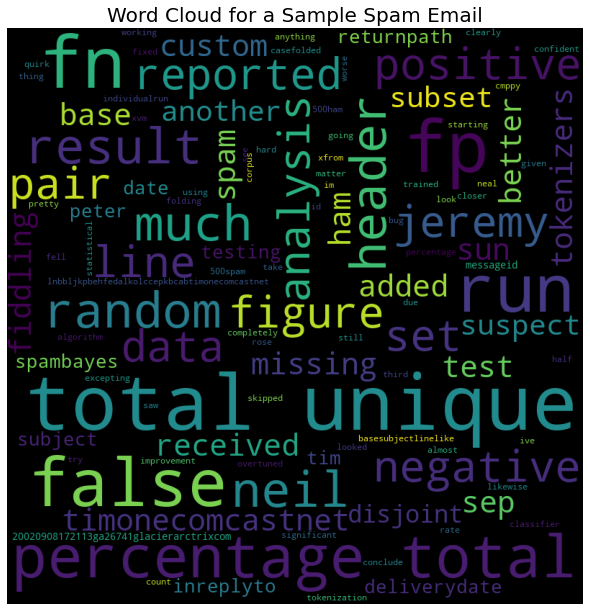

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

sample_text = x_test[4:6].values[0]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(sample_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for a Sample Spam Email', fontsize = 20)
  
plt.show()

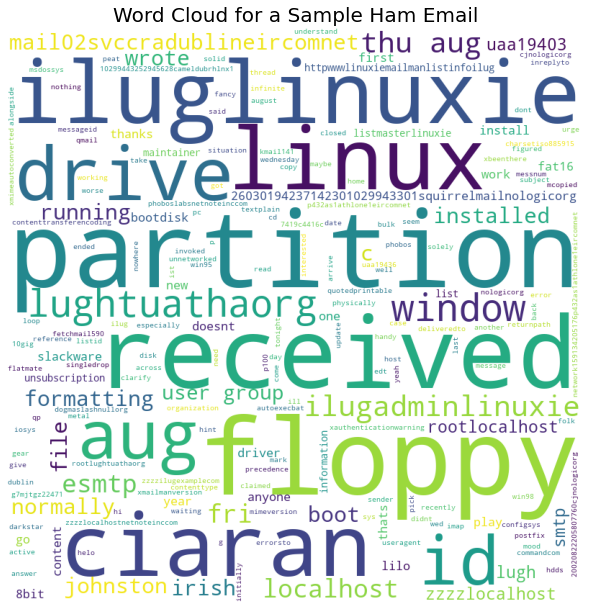

In [37]:
sample = x_test[1:3].values[0]
wordcld = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10).generate(sample)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcld) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for a Sample Ham Email', fontsize = 20)

plt.show()

## Limitations

From this dataset, it is difficult to identify clear factors such as text, that determine whether an email should be classified as spam or not.